In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/application_train00.csv')
pd.set_option('display.max_columns', None)
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
df.tail(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0,0.0,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0,0.0,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0742,0.0526,0.9881,NaN,0.0176,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0791,NaN,0.0,0.0756,0.0546,0.9881,NaN,0.0178,0.0806,0.0690,0.3750,NaN,NaN,NaN,0.0824,NaN,0.0,0.0749,0.0526,0.9881,NaN,0.0177,0.08,0.0690,0.

#1. Data Exploration

##1.1. Descriptive Statistics Analysis

##### basic-info

In [ ]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

##### check-missing-values

In [ ]:
# Checking missing values percentage
missing_val = pd.DataFrame({'missing_values': df.isna().sum().sort_values(ascending=False),
                        'percentage': round(df.isna().sum().sort_values(ascending=False)/df.shape[0]*100)
                        })
missing_val

,missing_values,percentage
COMMONAREA_MEDI,214865,70.0
COMMONAREA_AVG,214865,70.0
COMMONAREA_MODE,214865,70.0
NONLIVINGAPARTMENTS_MODE,213514,69.0
NONLIVINGAPARTMENTS_AVG,213514,69.0
...,...,...
NAME_HOUSING_TYPE,0,0.0
NAME_FAMILY_STATUS,0,0.0
NAME_EDUCATION_TYPE,0,0.0
NAME_INCOME_TYPE,0,0.0


##### check-duplicated-values

In [ ]:
# Checking duplicated values
df.duplicated().sum()

0

##### check-uniqness

In [ ]:
# Print the percentage similarity of values (the lower %, the better)
num_unique = df.nunique().sort_values(ascending=False)
print('---- Percentage Similarity of Values (%) -----')
print(num_unique)

---- Percentage Similarity of Values (%) -----
SK_ID_CURR            307511
EXT_SOURCE_2          119831
EXT_SOURCE_1          114584
DAYS_BIRTH             17460
DAYS_REGISTRATION      15688
                       ...  
NAME_CONTRACT_TYPE         2
FLAG_DOCUMENT_2            2
FLAG_DOCUMENT_3            2
FLAG_DOCUMENT_4            2
FLAG_OWN_REALTY            2
Length: 122, dtype: int64


##### drop-irrelevant-columns

Remove some columns that are not relevant and contain lots of null value.

In [ ]:
ir_columns = ['SK_ID_CURR', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df.drop(columns=ir_columns, axis=1, inplace=True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


##### descriptive-statistics

In [ ]:
# check numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.00000,-7479.500000,-4504.00000,-2010.000000,0.000000e+00


In [ ]:
# check categorical column
df.describe(exclude='number').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


##### drop 2

In [ ]:
df.drop(columns=['FLAG_MOBIL','ORGANIZATION_TYPE'], axis=1, inplace=True)
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

##1.2. Univariate Analysis

##### check-credit-score-ratio

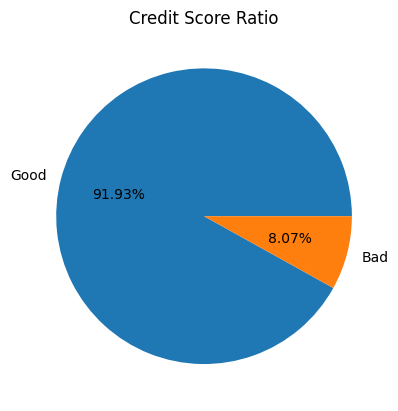

In [ ]:
df.groupby('TARGET').size().plot(kind='pie', labels=['Good', 'Bad'], autopct='%.2f%%')
plt.title('Credit Score Ratio')
plt.show()

##### featured-engineering

In [ ]:
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head(3)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531


In [ ]:
df['AGE'] = df['DAYS_BIRTH']/(-365.2425)
df['AGE_EMPLOYED'] = df['DAYS_EMPLOYED']/(-365.2425)
df['AGE_REGISTRATION'] = df['DAYS_REGISTRATION']/(-365.2425)
df['AGE_ID_PUBLISH'] = df['DAYS_ID_PUBLISH']/(-365.2425)
df.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'], axis=1, inplace=True)

#### display-histogram-for-numeric-columns

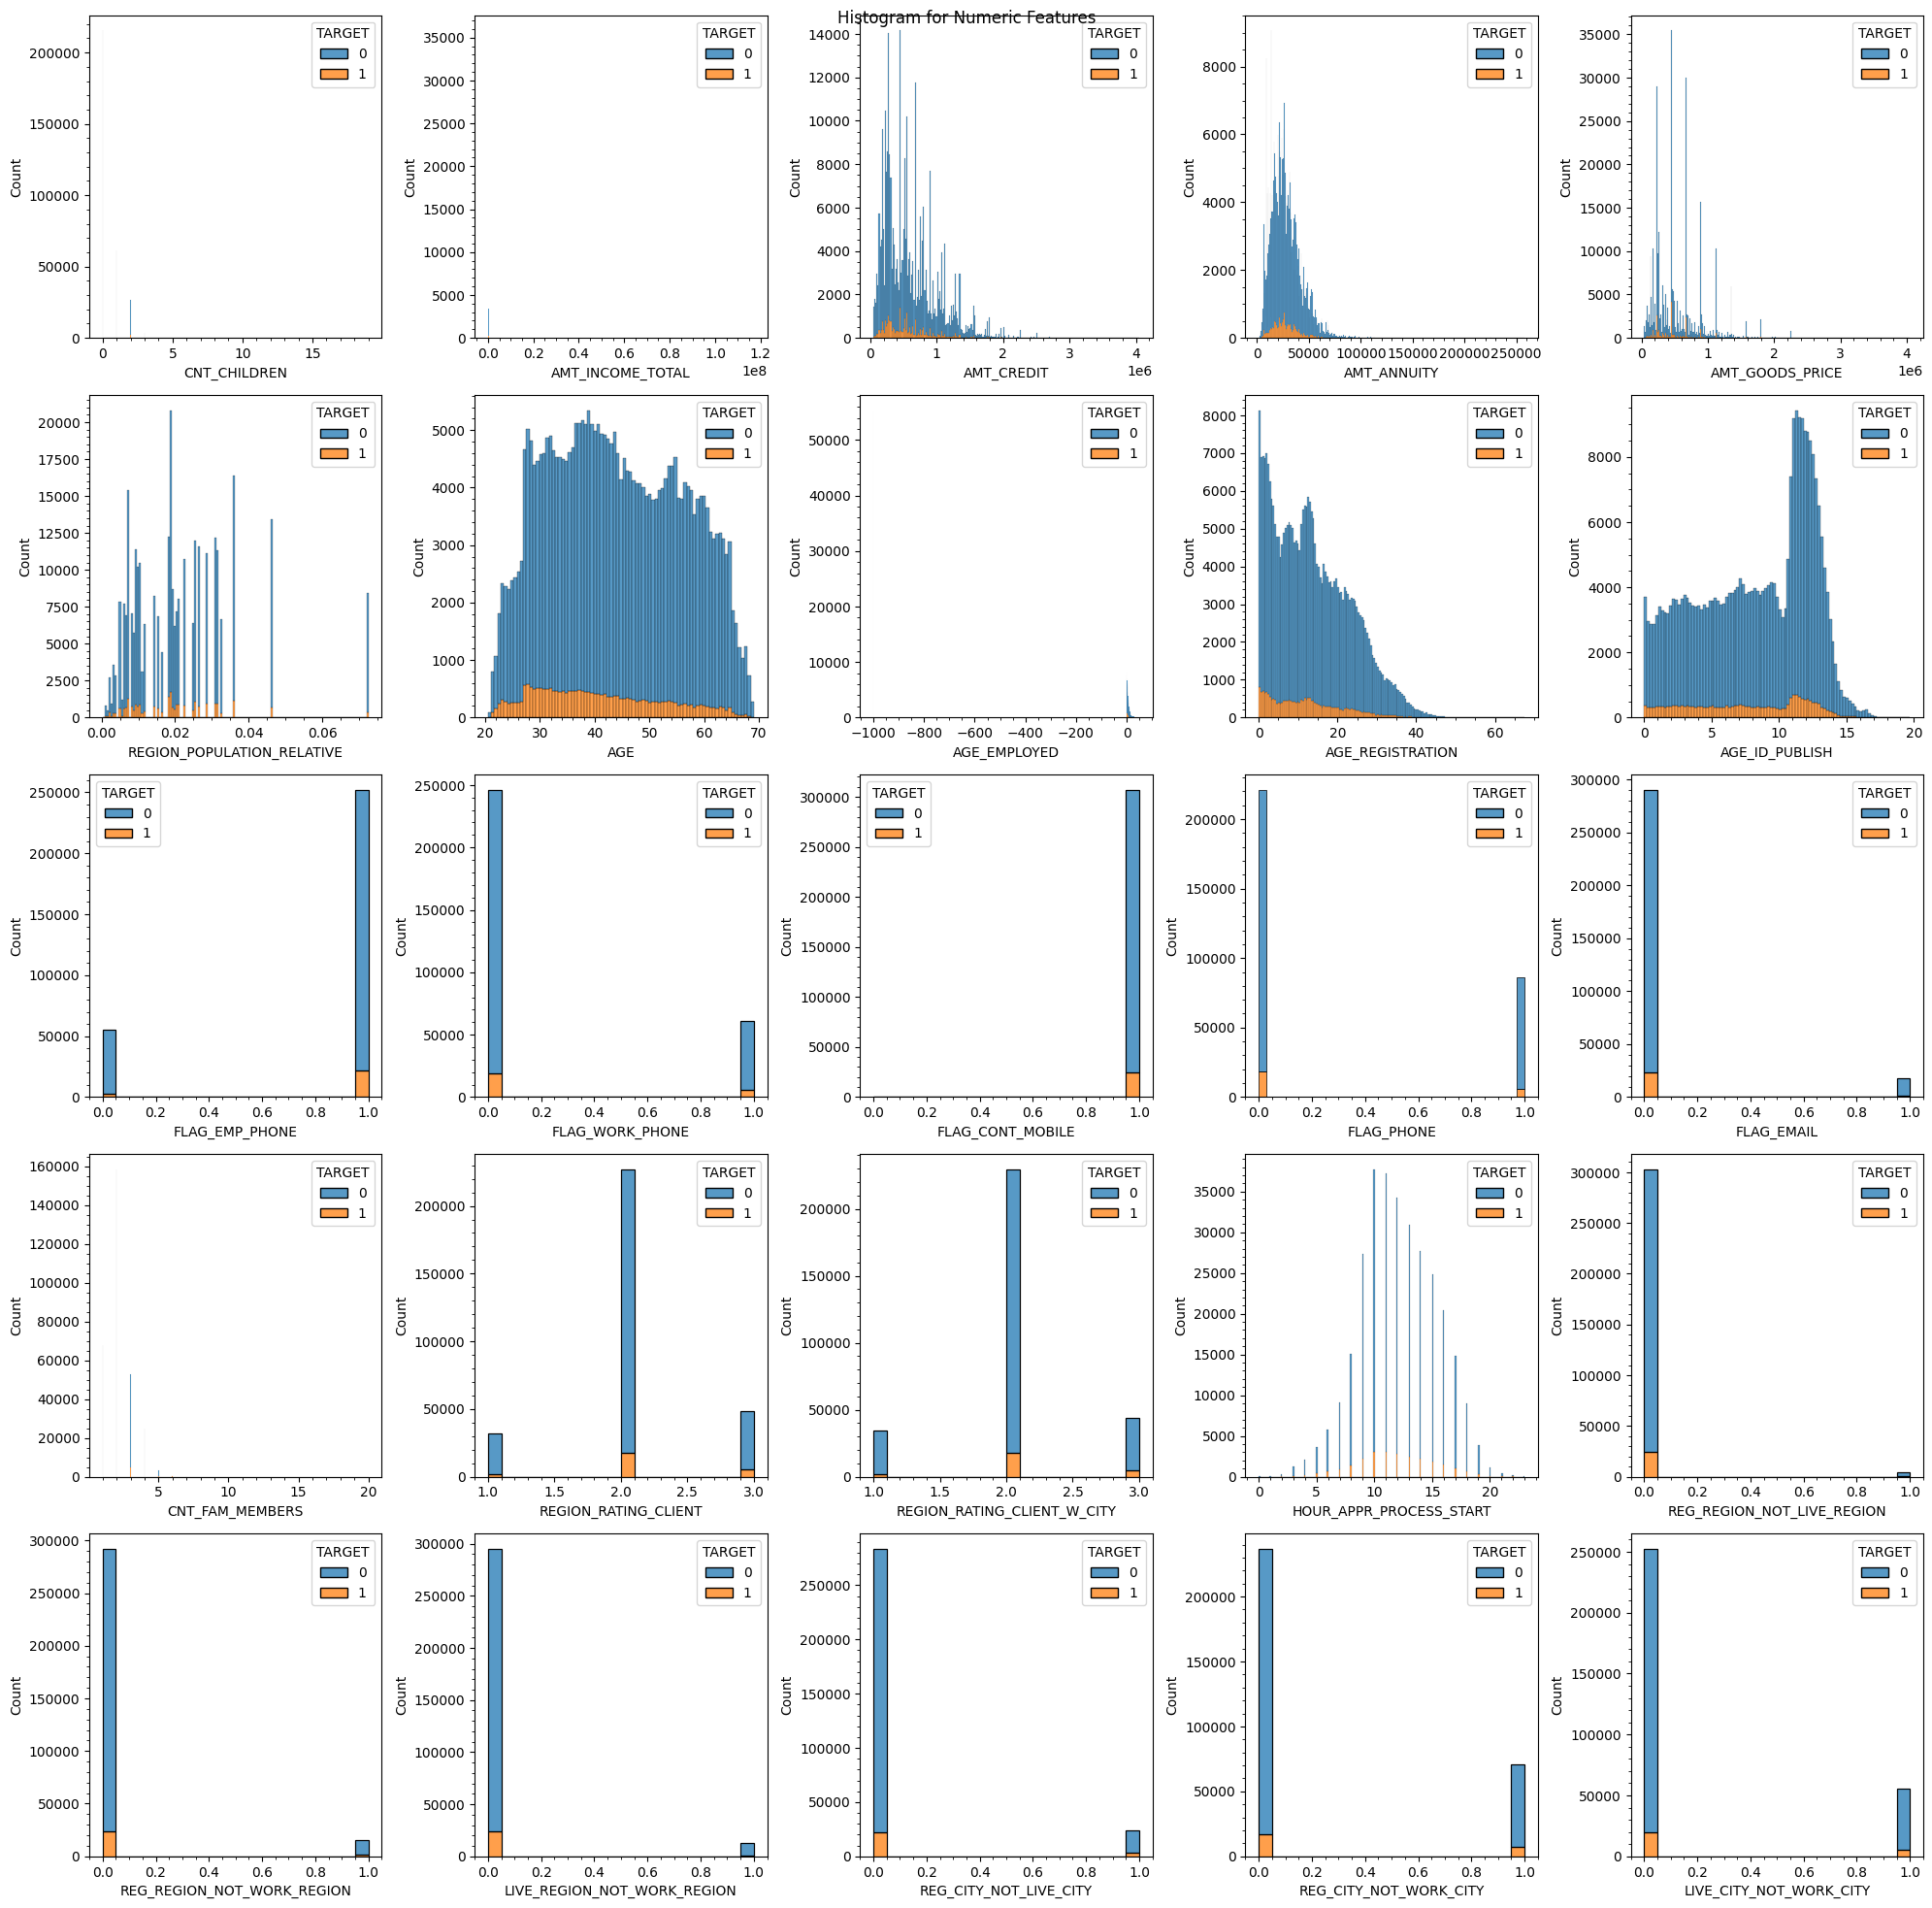

In [ ]:
# histogram for numeric columns
numeric_columns = ['CNT_CHILDREN',	'AMT_INCOME_TOTAL',	'AMT_CREDIT',	'AMT_ANNUITY',	'AMT_GOODS_PRICE',	'REGION_POPULATION_RELATIVE',	'AGE',	'AGE_EMPLOYED',	'AGE_REGISTRATION',	'AGE_ID_PUBLISH',	'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',	'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL',	'CNT_FAM_MEMBERS',	'REGION_RATING_CLIENT',	'REGION_RATING_CLIENT_W_CITY',	'HOUR_APPR_PROCESS_START',	'REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION',	'REG_CITY_NOT_LIVE_CITY',	'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY']
fig, axes = plt.subplots(5, 5, figsize=(20,20))

plt.suptitle('Histogram for Numeric Features')
i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.histplot(df, x=column, hue='TARGET', multiple='stack', ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [ ]:
df['AGE_EMPLOYED'].value_counts()

,count
AGE_EMPLOYED,
-1000.001369,55374
0.547581,156
0.613291,152
0.629719,151
0.544843,151
...,...
38.223920,1
32.381226,1
27.860942,1


In [ ]:
df["AGE_EMPLOYED"]=df["AGE_EMPLOYED"].replace(min(df['AGE_EMPLOYED']),0)

#### display-histogram-for-categorical-columns

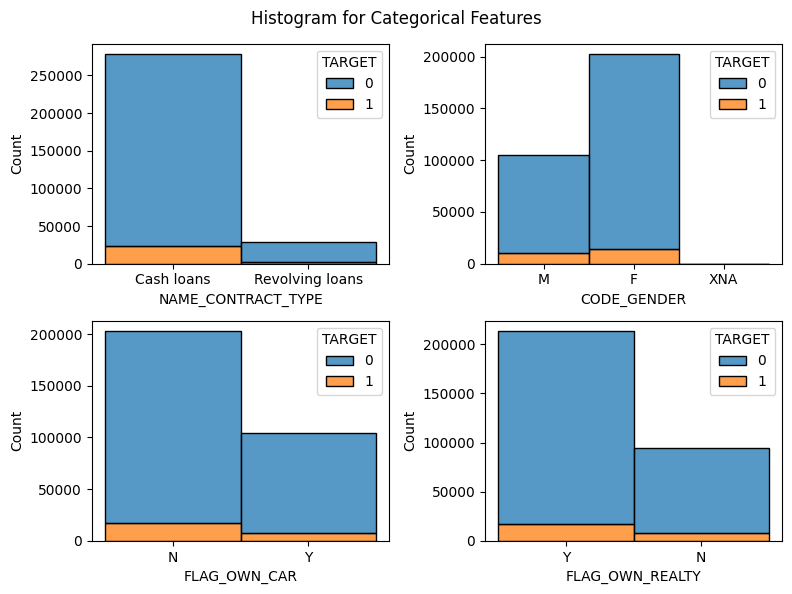

In [ ]:
categorical_columns1 = ['NAME_CONTRACT_TYPE',	'CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY']

fig, axes = plt.subplots(2, 2, figsize=(8,6))

plt.suptitle('Histogram for Categorical Features')

i = 0
for y in axes:
    for ax in y:
        column = categorical_columns1[i]
        sns.histplot(df, x=column, hue='TARGET', multiple='stack', ax=ax)
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [ ]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [ ]:
df["CODE_GENDER"]=df["CODE_GENDER"].replace("XNA","F")

In [ ]:
df["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].replace("Cash loans",0)
df["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].replace("Revolving loans",1)

df["CODE_GENDER"]=df["CODE_GENDER"].replace("F",0)
df["CODE_GENDER"]=df["CODE_GENDER"].replace("M",1)

df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].replace("N",0)
df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].replace("Y",1)

df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].replace("N",0)
df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].replace("Y",1)

<ipython-input-73-862bcf574af8>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].replace("Revolving loans",1)
<ipython-input-73-862bcf574af8>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CODE_GENDER"]=df["CODE_GENDER"].replace("M",1)
<ipython-input-73-862bcf574af8>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

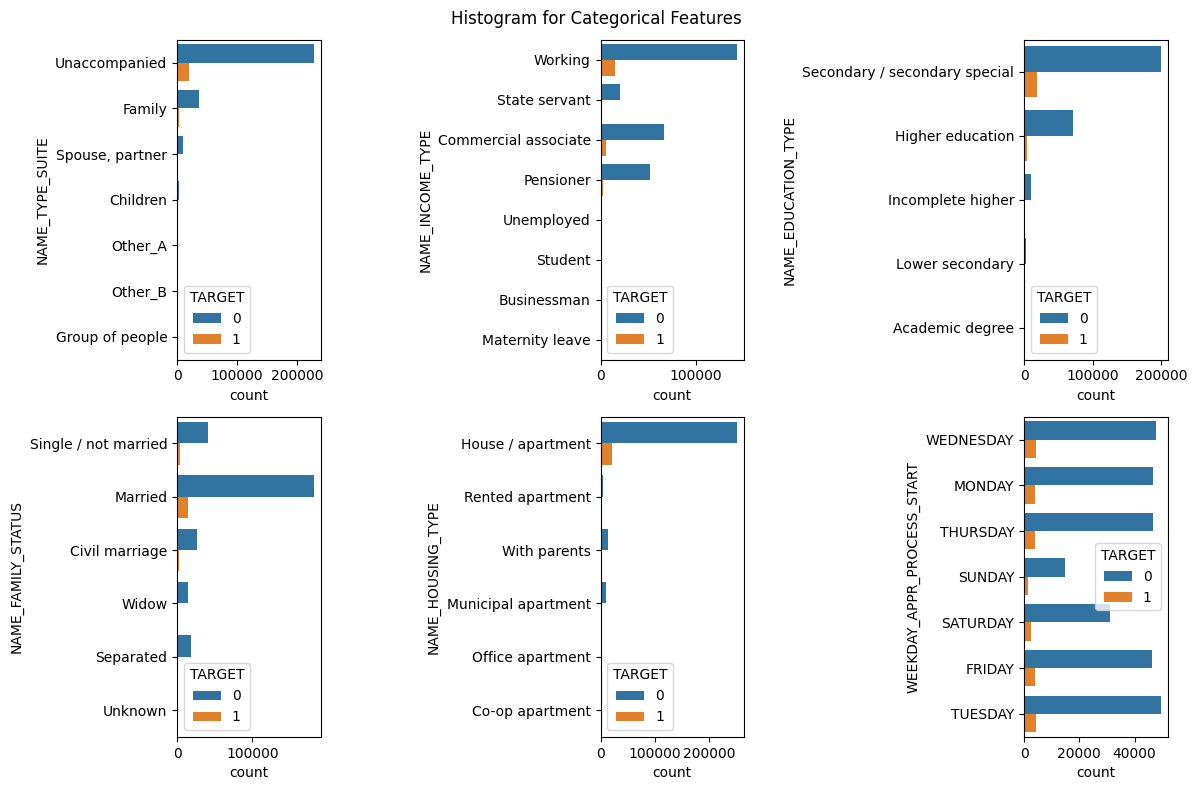

In [ ]:
categorical_columns2 = ['NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
fig, axes = plt.subplots(2, 3, figsize=(12,8))

plt.suptitle('Histogram for Categorical Features')

i = 0
for y in axes:
    for ax in y:
        column = categorical_columns2[i]
        sns.countplot(df, y=column, hue='TARGET', ax=ax)
        i += 1
fig.tight_layout(pad=1)
plt.show()

##1.3. Multivariate Analysis

#### display-heatmap

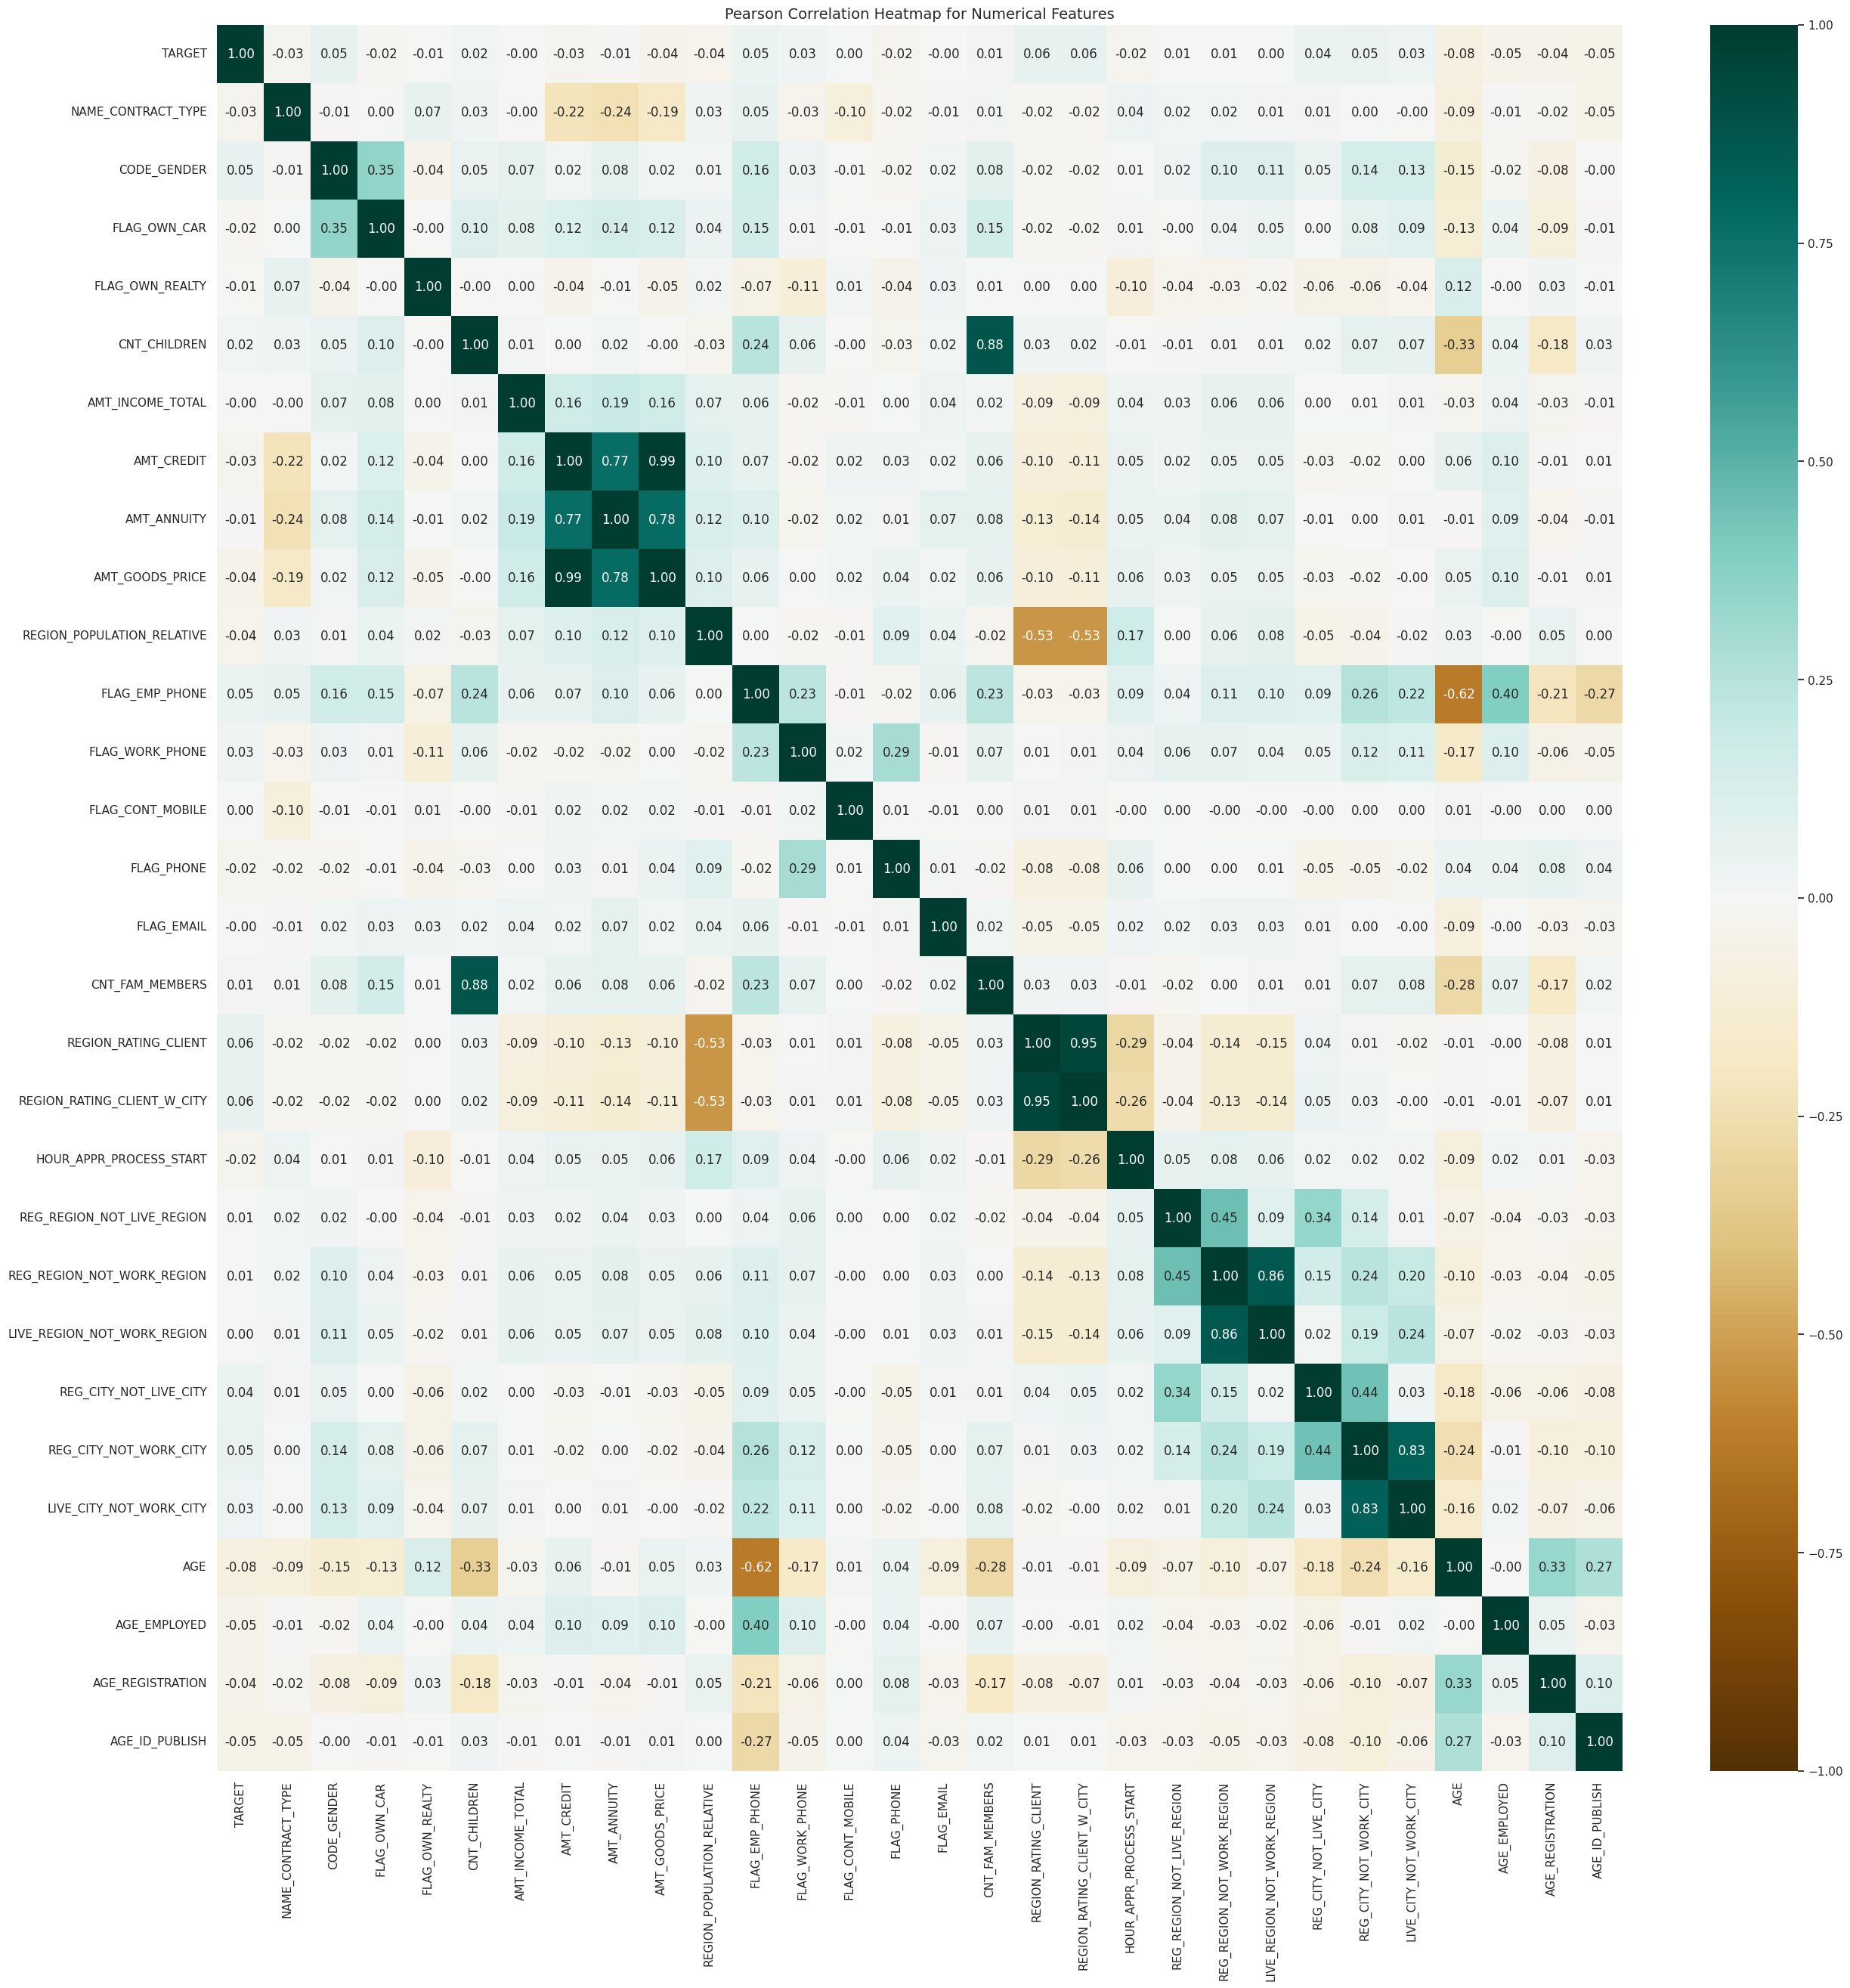

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')
sns.set(rc={"figure.figsize": (30,30)})
plt.title('Pearson Correlation Heatmap for Numerical Features', fontsize=14)
plt.show()

#### drop-irrelevant-or-redundant-columns

In [ ]:
columns=['CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY','NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
df.drop(columns=columns, axis=1, inplace=True)

In [ ]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'AGE',
       'AGE_EMPLOYED', 'AGE_REGISTRATION', 'AGE_ID_PUBLISH'],
      dtype='object')

#2. Data Pre-Processing

##2.1. Data Cleansing

###2.1.1. Handle missing values dan outliers

#### missing_values

In [ ]:
miss_vl = df.isnull().sum().sort_values(ascending=False)
print(miss_vl)

CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
AGE_REGISTRATION               0
AGE_EMPLOYED                   0
AGE                            0
REG_CITY_NOT_WORK_CITY         0
REG_CITY_NOT_LIVE_CITY         0
LIVE_REGION_NOT_WORK_REGION    0
REG_REGION_NOT_LIVE_REGION     0
HOUR_APPR_PROCESS_START        0
TARGET                         0
NAME_CONTRACT_TYPE             0
FLAG_PHONE                     0
REGION_POPULATION_RELATIVE     0
NAME_EDUCATION_TYPE            0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
FLAG_OWN_REALTY                0
FLAG_OWN_CAR                   0
CODE_GENDER                    0
AGE_ID_PUBLISH                 0
dtype: int64


In [ ]:
df[df.isna().any(axis=1)]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,AGE,AGE_EMPLOYED,AGE_REGISTRATION,AGE_ID_PUBLISH
41982,0,1,1,0,1,450000.0,675000.0,Lower secondary,0.015221,1,NaN,2,15,0,1,0,1,33.939095,3.178710,8.939266,12.290465
187348,0,1,0,0,1,202500.0,585000.0,Higher education,0.031329,0,NaN,2,14,0,0,0,0,35.165678,0.635194,4.372437,4.301252


In [ ]:
df = df.dropna()

#### split-into-training-and-test

In [ ]:
target = 'TARGET'
features = df.loc[:, df.columns != target].columns
x_data = df[features]
y_data = df[target]

# split data to 80% data train and 20% data test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=25, stratify=y_data)

# check amount of data on train and test
print('Number of data train rows =', x_train.shape[0])
print('Number of data test rows =', x_test.shape[0])

Number of data train rows = 246007
Number of data test rows = 61502


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307509 non-null  int64  
 1   NAME_CONTRACT_TYPE           307509 non-null  int64  
 2   CODE_GENDER                  307509 non-null  int64  
 3   FLAG_OWN_CAR                 307509 non-null  int64  
 4   FLAG_OWN_REALTY              307509 non-null  int64  
 5   AMT_INCOME_TOTAL             307509 non-null  float64
 6   AMT_CREDIT                   307509 non-null  float64
 7   NAME_EDUCATION_TYPE          307509 non-null  object 
 8   REGION_POPULATION_RELATIVE   307509 non-null  float64
 9   FLAG_PHONE                   307509 non-null  int64  
 10  CNT_FAM_MEMBERS              307509 non-null  float64
 11  REGION_RATING_CLIENT         307509 non-null  int64  
 12  HOUR_APPR_PROCESS_START      307509 non-null  int64  
 13  REG_

#### check-outliers

In [ ]:
from scipy import stats
cats = ['NAME_EDUCATION_TYPE']
nums = [i for i in df.columns if (i!='NAME_EDUCATION_TYPE') & (i!='TARGET')]
nums_not_binary = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'AGE', 'AGE_EMPLOYED', 'AGE_REGISTRATION', 'AGE_ID_PUBLISH']

outlier = pd.DataFrame()
filtered = np.array([True] * len(x_train))

for col in nums_not_binary:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    outlier[col] = x_train[col][(x_train[col] < low_limit) | (x_train[col] > high_limit)]
    filtered = ((x_train[col] >= low_limit) & (x_train[col] <= high_limit)) & filtered

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11286 entries, 35762 to 259066
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AMT_INCOME_TOTAL            11286 non-null  float64
 1   AMT_CREDIT                  1443 non-null   float64
 2   REGION_POPULATION_RELATIVE  1680 non-null   float64
 3   CNT_FAM_MEMBERS             201 non-null    float64
 4   HOUR_APPR_PROCESS_START     114 non-null    float64
 5   AGE                         0 non-null      float64
 6   AGE_EMPLOYED                712 non-null    float64
 7   AGE_REGISTRATION            16 non-null     float64
 8   AGE_ID_PUBLISH              0 non-null      float64
dtypes: float64(9)
memory usage: 881.7 KB


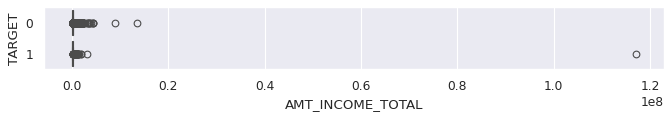

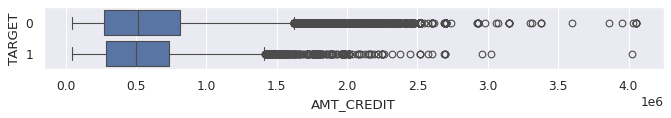

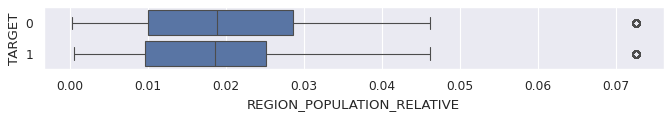

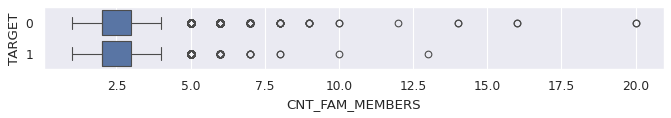

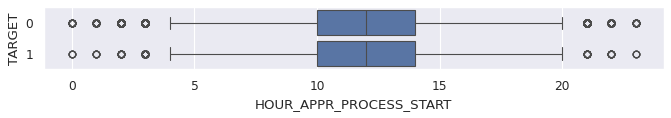

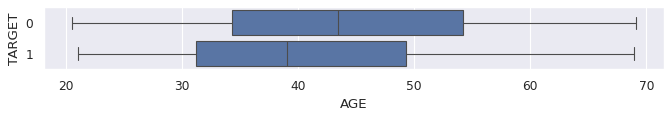

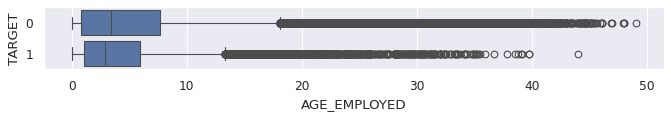

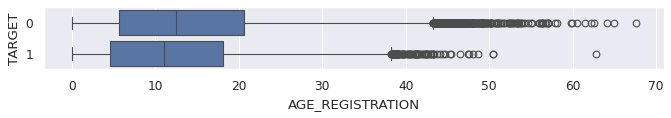

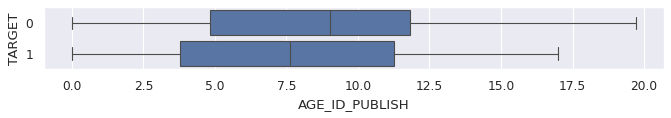

In [ ]:
for i in nums_not_binary:
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = x_train[i], y=y_train, data = x_train,orient="h")
    plt.show()

###2.1.2. Feature Transformation and Feature Encoding

#### tranformation/encoding-features

In [ ]:
nums_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ])

edu_list = ['Lower Secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
edu_transformer = Pipeline(
    steps=[
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[edu_list])),
    ]
    )

preprocessor = ColumnTransformer(
    transformers=[
        ('nums', nums_transformer, nums_not_binary),
        ('edu', edu_transformer, ['NAME_EDUCATION_TYPE']),
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('nums',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'REGION_POPULATION_RELATIVE',
                                  'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
                                  'AGE', 'AGE_EMPLOYED', 'AGE_REGISTRATION',
                                  'AGE_ID_PUBLISH']),
                                ('edu',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Lower '
                                                                              'Secondary',
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['NAME_EDUCATION_TYPE'])])

###2.1.4. Handle Class Imbalance

#### smote-method

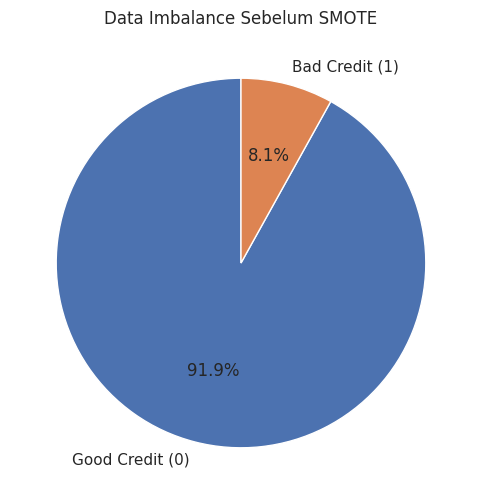

In [ ]:
# Data sebelum SMOTE
before_smote = y_train.value_counts()
labels_before = ['Good Credit (0)', 'Bad Credit (1)']
plt.figure(figsize=(6, 6))
plt.pie(before_smote, labels=labels_before, autopct='%1.1f%%', startangle=90)
plt.title('Data Imbalance Sebelum SMOTE')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[6], random_state=25)
x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
data_after_smote = pd.DataFrame(x_resampled, columns=x_train.columns)
data_after_smote['TARGET'] = y_resampled

In [ ]:
Y_train = data_after_smote['TARGET']
X_train = data_after_smote.drop(['TARGET'],axis=1)

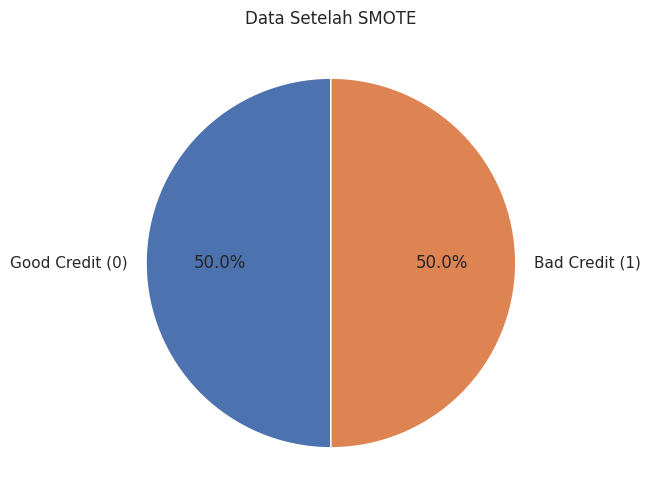

In [ ]:
# Data sesudah SMOTE
after_smote = y_resampled.value_counts()
labels_after = ['Good Credit (0)', 'Bad Credit (1)']
plt.figure(figsize=(6, 6))
plt.pie(after_smote, labels=labels_after, autopct='%1.1f%%', startangle=90)
plt.title('Data Setelah SMOTE')
plt.show()

##2.2. Feature Engineering

In [ ]:
X=x_train.copy()

In [ ]:
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Lower secondary',0)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Secondary / secondary special',1)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Incomplete higher',2)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Higher education',3)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Academic degree',4)

<ipython-input-101-86d069056875>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Academic degree',4)


###2.2.1. Feature Selection

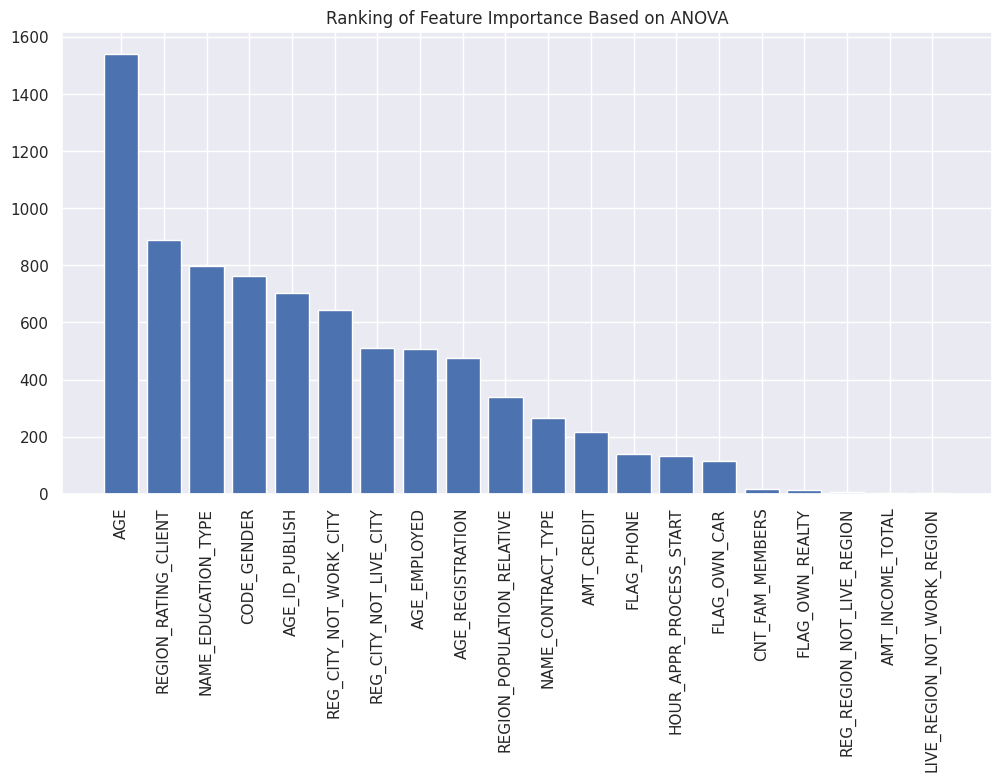

In [ ]:
selector = SelectKBest(f_classif, k='all')
kbest_fit = selector.fit_transform(X, y_train)

columns = X.columns

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(len(columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores[i])[1])

plt.figure(figsize=(12, 6))  # Menyesuaikan lebar dan tinggi figure
plt.bar(col_list,num_list)
plt.xticks(rotation=90)
plt.title('Ranking of Feature Importance Based on ANOVA')

plt.show()

#3. Machine Learning Modelling & Evaluation

##3.1. Model Evaluation

### Logistic Regression

F1 score data TRAIN : 67.506 %
F1 score data TEST  : 18.987 %
Accuracy score data TRAIN : 65.744 %
Accuracy score data TEST  : 60.04 %


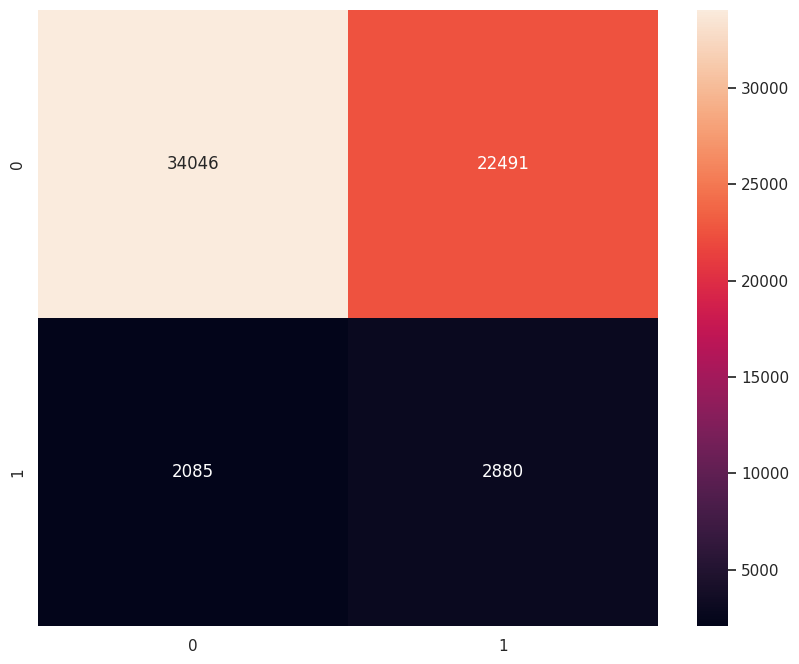

In [ ]:
LRC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

LRC.fit(X_train, Y_train)
y_train_pred = LRC.predict(X_train)
y_pred = LRC.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

fig, ax = plt.subplots(figsize=(10, 8)) # Mengatur ukuran figure menjadi 10x8 inci
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "2d")
plt.show()

In [ ]:
#Hyperparameter tuning logistic regression
param_grid = {
    'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : [1,2,3,4,5],
}

rs = RandomizedSearchCV(LRC, param_grid, n_iter=50, n_jobs=-1, cv=5, scoring='f1', random_state=25)
rs.fit(X_train, Y_train)

print('Best hyperparameters using randomized search:', rs.best_params_)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in

Best hyperparameters using randomized search: {'classifier__penalty': 'l2', 'classifier__C': 2}


In [ ]:
LR_best_clf = LogisticRegression(random_state=25, penalty='l2', C=1)

LR_best_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LR_best_clf)
    ]
)

LR_best_pipe.fit(X_train, Y_train)

y_train_pred = LR_best_pipe.predict(X_train)
y_pred = LR_best_pipe.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

F1 score data TRAIN : 67.506 %
F1 score data TEST  : 18.987 %
Accuracy score data TRAIN : 65.744 %
Accuracy score data TEST  : 60.04 %


###Decision Tree

F1 score data TRAIN : 100.0 %
F1 score data TEST  : 12.901 %
Accuracy score data TRAIN : 100.0 %
Accuracy score data TEST  : 82.48 %


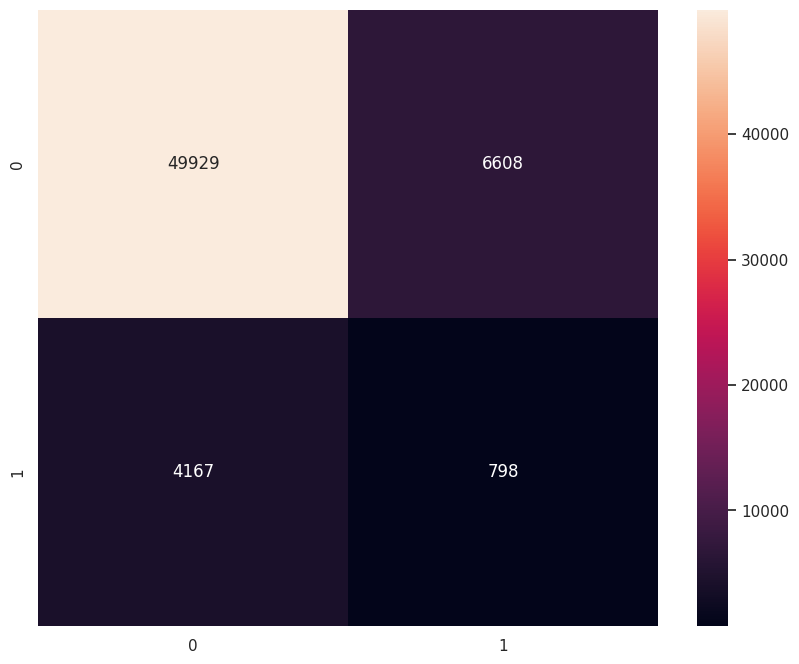

In [ ]:
DTC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=25))
    ]
)

DTC.fit(X_train, Y_train)
y_train_pred = DTC.predict(X_train)
y_pred = DTC.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

fig, ax = plt.subplots(figsize=(10, 8)) # Mengatur ukuran figure menjadi 10x8 inci
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "2d")
plt.show()


In [ ]:
#Hyperparameter tuning decision tree
dtc = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=25))
    ]
)

param_grid = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth' : range(2, 22, 2),
    'classifier__max_features' : ['sqrt', 'log2', None],
    'classifier__min_samples_split' : range(2, 42, 2),
    'classifier__min_samples_leaf' : range(2, 22, 2),
}

rs = RandomizedSearchCV(dtc, param_grid, n_iter=50, n_jobs=-1, cv=5, scoring='f1', random_state=25)
rs.fit(X_train, Y_train)

print('Best hyperparameters using randomized search:', rs.best_params_)

Best hyperparameters using randomized search: {'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 10, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__criterion': 'gini'}


In [ ]:
dt_best_clf = DecisionTreeClassifier(random_state=25, min_samples_split=20,
                                    min_samples_leaf=10, max_features=None,
                                    max_depth=20, criterion='gini')

dt_best_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', dt_best_clf)
    ]
)

dt_best_pipe.fit(X_train, Y_train)

y_train_pred = dt_best_pipe.predict(X_train)
y_pred = dt_best_pipe.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

F1 score data TRAIN : 90.71 %
F1 score data TEST  : 8.586 %
Accuracy score data TRAIN : 91.186 %
Accuracy score data TEST  : 87.848 %
